# Algoritmos de aprendizaje automático supervisado

## Librerias

In [1]:
import numpy as np
import mglearn.datasets
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from mglearn.datasets import load_boston

## Algunos conjuntos de datos de muestra

X.shape: (26, 2)


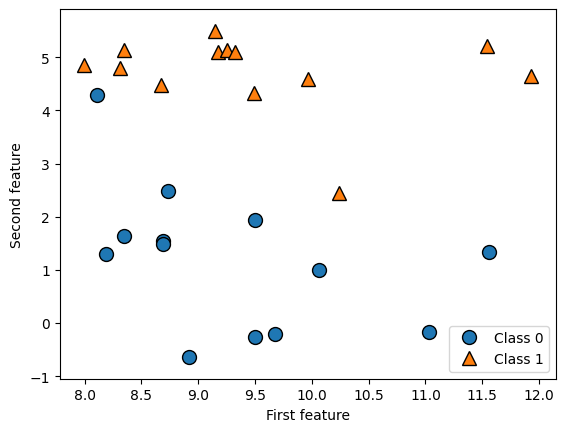

In [5]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Conjunto de ondas sinteticas, tiene una sola caracteristica de entrada y una variable objetivo continua.

Text(0, 0.5, 'Target')

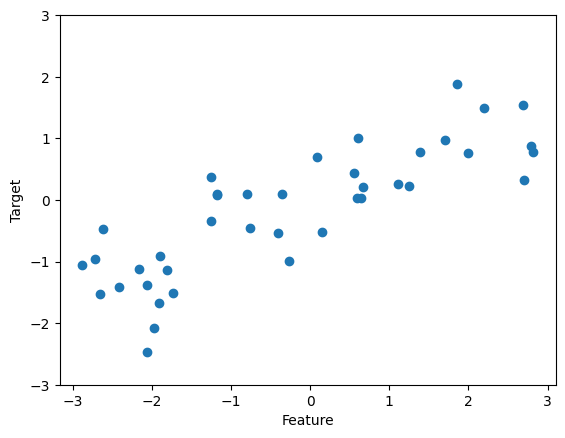

In [6]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

Ahora se usara un conjunto de datos del mundo real.
Este es el conjunto de datos Wisconsin Breast Cancer, que registra las mediciones clinicas de los tumores de cancer de mama.

In [3]:
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


El dataset consta de 569 puntos con 30 entidades cada uno.

In [4]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


De estos 569 puntos de datos, 212 estan etiquetados como malignos y 357 como benignos.

In [7]:
print("Sample counts per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


Para obtener una descripcion del significado semantico de cada caracteristica, podemos observar el atributo feature_names

In [8]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Datos de regresion del mundo real usando el conjunto de datos Boston Housing.

In [2]:
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


Conjunto de datos derivado.

In [3]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


## K-Vecinos mas cercanos

El algoritmo de **K-Nearest Neighbors** es posiblemente el algoritmo de aprendizaje automatico mas simple.

La creacion del modelo consiste en almacenar el conjunto de datos de entrenamiento y para hacer la prediccion de un nuevo punto de datos el algoritmo encuentra los puntos mas cercanos.

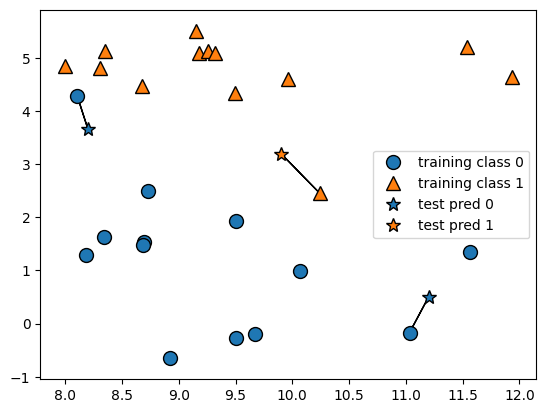

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

En lugar de considerar solo el vecino mas cercano, se puede considerar usar un numero arbitrario de K.
Al usar mas de un vecino, la eleccion de la etiqueta se hace mediante votacion.
La votacion consiste en contar cuantos vecinos tiene de una categoria y cuantos de la otra y se asigna la etiqueta seleccionando la categoria mas frecuente como vecina.

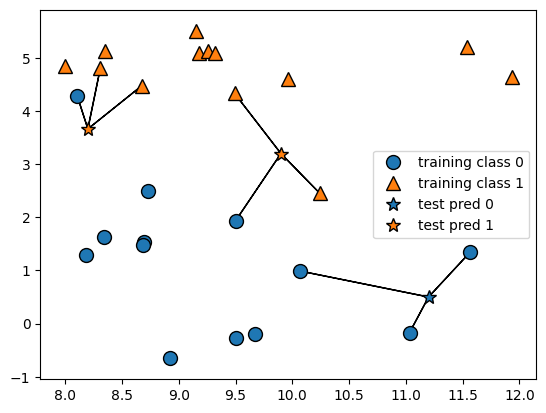

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Ahora veamos como se realiza el algoritmo K-Nearest Neighbors en scikit-learn.
- Primero debemos dividir los datos en un conjunto de entrenamiento y otro de prueba para poder evaluar el rendimiento de la generalizacion.

In [3]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Ahora se importan e instancian las clases

In [5]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

Ahora se coloca el clasificador usando el conjunto de entrenamiento.

In [4]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Ahora se llama al metodo de prediccion.

In [5]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


Para evaluar que tan bien se generaliza el modelo, podemos usar el metodo de puntuacion.

In [6]:
print("Test accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test accuracy: 0.86


El modelo tiene una presicion de aproximadamente el 86%, lo que significa que el modelo predijo la clase correctamente para el 86% de las muestras del conjunto de prueba.

### Analisis de KNeighborsClassifier

Para conjuntos de datos bidimensionales, tambien podemos ilustrar la prediccion para todos los puntos de prueba posibles en el plano xy.

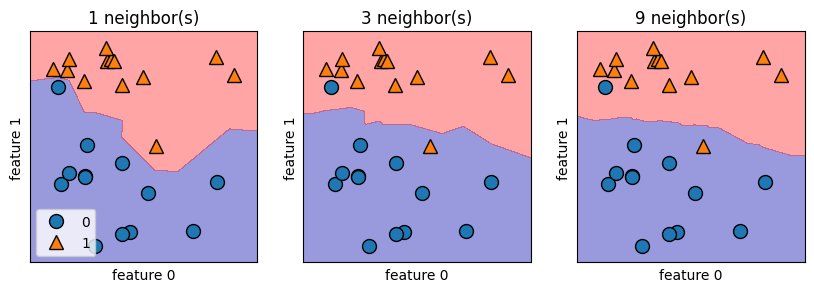

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(
        clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

Limites de decision creados por el modelo de vecinos mas cercanos para diferentes valores de n_neighbors.

Evaluacion del rendimiento del equipo de entrenamiento y prueba con diferentes numeros de vecinos.

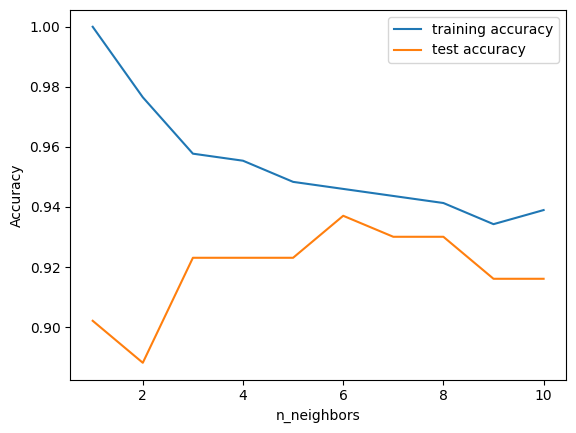

In [6]:
import matplotlib.pyplot as plt
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

train_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, train_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

El mejor punto de presicion es alrededor de 6 vecinos, que da un valor cercano a 94% de presicion, y el peor es alrededor de 2 vecinos que da un valor cercano a 88% lo que sigue siendo aceptable.

Tambien existe una variante de regresion para el algoritmo de K-nearest neighbor. Probemos con un solo vecino.

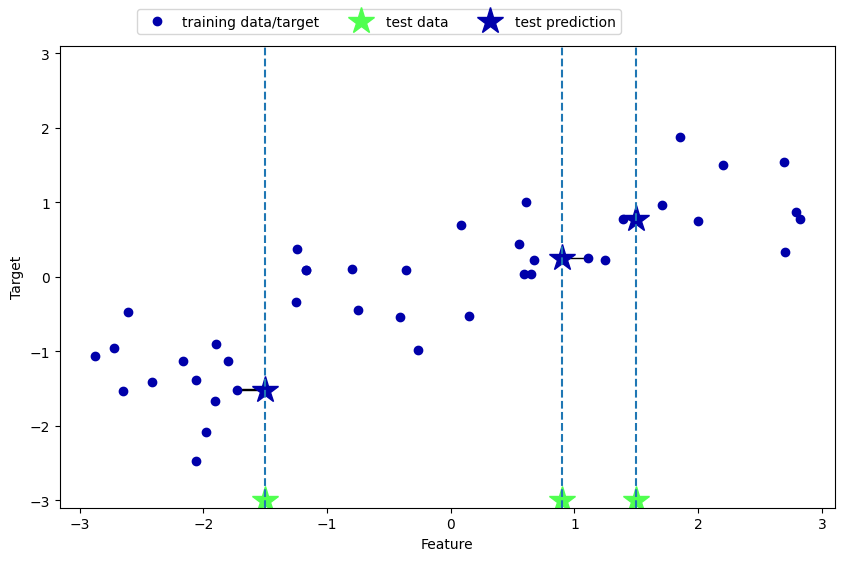

In [2]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

Ahora con un mayor numero de vecinos. Cuando hay mas de uno la prediccion se realiza con el promedio o la media de los vecinos mas cercanos.

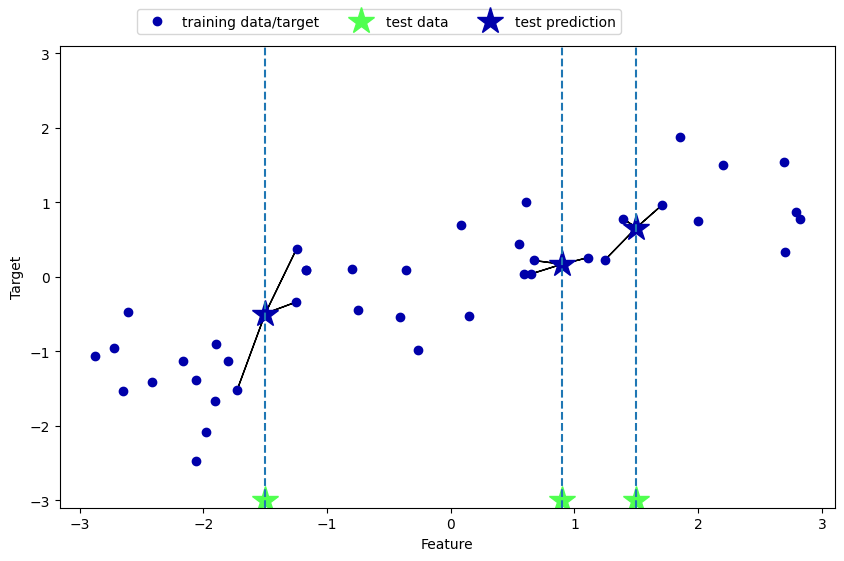

In [3]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

Ahora usemoslo con Scikit-learn

In [4]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Ahora podemos hacer predicciones en el conjunto de prueba.

In [6]:
print("Test set predictions:\n {}".format(reg.predict(X_test)))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


Podemos evaluar el modelo utilizando el metodo de puntuacion, que para los regresores devuelve la puntuacion R2.
La puntuacion R2 tambien conocida como coeficiente de determinacion es una medida de bondad de una prediccion para un modelo de regresion, y arroja una puntuacion entre 0 y 1.
Un valor de 1 corresponde a una prediccion perfecta y un valor de 0 corresponde a un modelo constante que solo predice la media de las respuestas del conjunto de entrenamiento.

In [7]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


La puntuacion es de 0.83 lo que significa un ajuste relativamente bueno del modelo.

### Análisis de KNeighborsRegressor

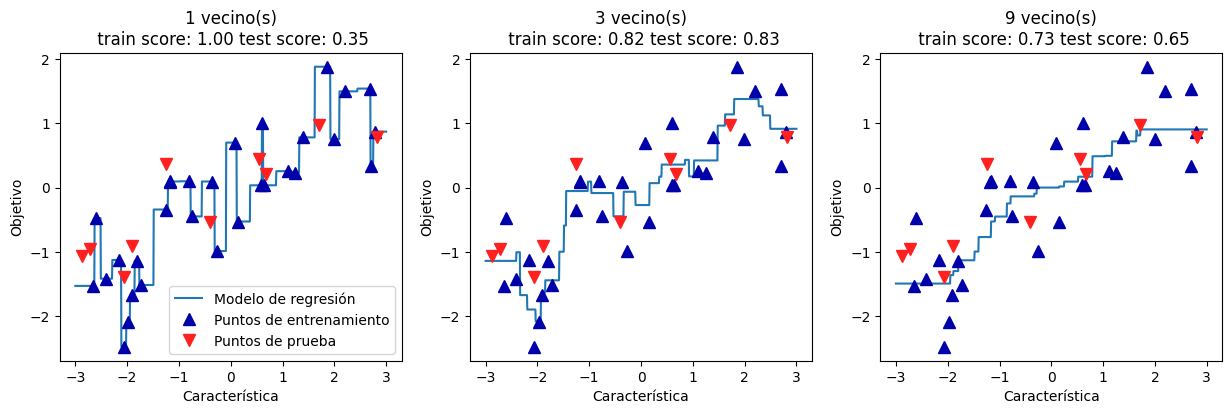

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# crear 1.000 puntos de datos, espaciados uniformemente entre -3 y 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # hacer predicciones usando 1, 3 o 9 vecinos
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} vecino(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Característica")
    ax.set_ylabel("Objetivo")
    
axes[0].legend(["Modelo de regresión", "Puntos de entrenamiento",
               "Puntos de prueba"], loc="best")

Usando un solo vecino, cada punto tiene una influencia obvia en el conjunto de entrenamiento, pero hace que las predicciones sean muy inestables, por lo que tener en cuenta mas vecinos conduce a predicciones mas suaves, aunque no se ajustan tan bien a los datos de entrenamiento.